In [1]:
# pacchetto degli ALGORITMI

def QuickSort( A, p, q ):
    if( p < q ):
        r = Partition( A, p, q)
        QuickSort( A, p, r-1 )
        QuickSort( A, r+1, q )
    return A

def Partition(A, p, q):
    x = A[q]
    i = p - 1
    for j in range(p, q):
        if A[j] <= x:   # (corretto A[j], non A[q])
            i += 1
            Scambia(A, i, j)
    Scambia(A, i + 1, q)    # posiziona il pivot al centro
    return i + 1

def Scambia(A, i, j):
    temp = A[i]
    A[i] = A[j]
    A[j] = temp

def QuickSort3Way(arr, l, r):
    if l >= r:
        return

    lt = l
    i = l
    gt = r
    pivot = arr[l]

    while i <= gt:
        if arr[i] < pivot:
            arr[lt], arr[i] = arr[i], arr[lt]
            lt += 1
            i += 1
        elif arr[i] > pivot:
            arr[i], arr[gt] = arr[gt], arr[i]
            gt -= 1
        else:
            i += 1

    QuickSort3Way (arr, l, lt - 1)
    QuickSort3Way (arr, gt + 1, r)

    return lt, gt

def countingSort(arr):
    max = arr[0]
    min = arr[0]

    for i in range(1, len(arr)):
        if arr[i] > max:
            max = arr[i]
        elif arr[i] < min:
            min = arr[i]

    C = [0] * (max - min + 1)
    for i in range(len(arr)):
        C[arr[i] - min] += 1

    k = 0
    for i in range(len(C)):
        while C[i] > 0:
            arr[k] = i + min
            k += 1
            C[i] -= 1
    return arr

def RadixSort(arr):
    radix_array = [[], [], [], [], [], [], [], [], [], []]  # array delle cifre
    max_val = max(arr)  # assegno il valore massimo dell'array
    exp = 1 

    while (max_val // exp) > 0:
        while len(arr) > 0:
            val = arr.pop()
            radix_index = (val // exp) % 10
            radix_array[radix_index].append(val)

        for bucket in radix_array:
            while len(bucket) > 0:
                val = bucket.pop()
                arr.append(val)

        exp *= 10
    return arr    

In [ ]:
# MISURAZIONE TEMPI MEDI DI ESECUZIONE:
# Al variare di:
# - n = lunghezza array
# - m = dimensione range interi elementi array

# 100 <= n <= 100000
# 10 <= m <= 1000000

# asse x = n o m, y = tempo medio esecuzione 
# se asse x = n -> m = 100000 costante
# se asse x = m -> n = 10000 costante

# Genera ALMENO 100 campioni per grafico, ciascuno è un possibile valore per n o m con corrispondente tempo medio di esecuzione
# Valori di n/m -> serie geometrica nell'intervallo specificato sopra per ciascuno [usa ciclo for da i=0 a 99 e definisci lunghezza n come
# funzione esponenziale di i, es. n_i = floor(A*B^i) con A e B costanti in virgola mobile così da ottenere n_i=100 se i=0 e ni=100000 se i=99]

# (Una serie geometrica è una sequenza di numeri in cui ogni termine è ottenuto moltiplicando il precedente per una costante, chiamata ragione (o rapporto), 
# indicata spesso con r. es. valore 1, ragione 2 -> 1,2,4,8,16,32,...)

# Scelti valori per n e m -> misurazione tempo medio esecuzione avviene generando array di n interi scelti casualmente nell'intervallo [1,m].
# NOTA: l'array verrà modificato per cui bisogna rigenerarlo ad ogni misurazione.
# aggiungi tempo inizializzazione array al tempo di esecuzione, oppure stimata separatamente e in seguito sottratta al tempo totale per inizializzazione
# ed esecuzione algoritmo di ordinamento.

# Per stime tempi medi di esecuzione meno sensibili al contenuto dell'array generato -> una decina di misurazioni per la stessa scelta dei parametri
# n ed m, poi calcola media tempi di esecuzione misurati

# !) Stima tempi di esecuzione di un algoritmo su un array deve garantire ERRORE RELATIVO MASSIMO = 0.001
# -> per tutte le misurazioni del tempo trascorso serve usare un clock di sistema monotono (perf_counter() modulo time python)
# -> 1) stimo risoluzione clock di sistema con ciclo while per calcolare intervallo minimo di tempo misurabile
import time
...
def resolution():
    start = time.perf_counter()
    while time.perf_counter() == start:
        pass
    stop = time.perf_counter()
    return stop - start

# -> 2) in funzione della risoluzione stimata R e dell'errore relativo massimo ammissibile (E=0.001), calcolo tempo minimo misurabile
#       Tmin = R * (1/E + 1)

# Stima tempo medio secuzione -> ciclo while, iterando esecuzione algoritmo su input grande n generato con interi scelti casualmente nel range [1,m]
# e misurando complessivamente un intervallo di tempo superiore a Tmin.
# Effettua misurazione senza interrompere clock = calcolando intero intervallo di tempo trascorso dall'inizio dell'iterazione fino a quando tempo 
# misurato risulti superiore a Tmin.

# Tempo medio di esecuzione per una singola istanza di input sarà ottenuto calcolando il rapporto fra tempo totale misurato e il numero di iterazioni
# dell'algoritmo eseguite (questa divisione non influisce sull'errore relativo commesso).

# Procedura di misurazione in pseudocodice:  
'''
function measure(n, m, min_time):
    // n is the desired size of the array
    // m is the size of the range of integers appearing in the array
    // min_time is the minumum measurable time, calculated as suggested above
    count = 0
    start_time = get_time() // mi raccomando: l'inizio del clock va messo fuori dal ciclo while!!!!
    while True:
        a = initialize_array(n, m)
        execute_algorithm(a)
        count = count + 1
        end_time = get_time()
        if end_time - start_time >= min_time
             break
    return (end_time - start_time) / count
'''    

# stimare preventivamente tempo medio di inizializzazione e poi sottrarre tale stima al tempo totale di esecuzione (alla procedura sopra metti alla fine:
return (end_time - start_time) / count - avg_init_time

# CONSIGLI: usa grafici comparativi, sia in scale lineari - che riportano ad es. n in ascissa e t(n) in ordinata - sia scale doppiamente logaritmiche
#           che riportano ad es. log(n) in x e log(t(n)) in y.

In [2]:
n = list(range(100,100001)) # lunghezza array
m = list(range(10, 1000001)) # range interi dell'array

In [6]:
# PRIMA VERSIONE - N VARIABILE E N COSTANTE
# metteremo n nell'ascissa quindi m = 100000 costante
m = 100000

# 100 campioni
import math

def genera_campioni_uno():
    # ricavo A e B in base a quello che viene fornito dal problema
    A = 100
    B = 1.0723
    n_i = []
    for i in range(0,100):
        # campioni in serie geometrica
        n_i.append(math.floor(A*B**i))
    return n_i

In [3]:
# SECONDA VERSIONE - M VARIABILE E N COSTANTE
# metteremo m nell'ascissa quindi n = 10000 costante
n = 10000

# 100 campioni
import math

# per la serie geometrica ne usiamo una differente (altrimenti usa gli stessi valori di quella con n variabile):
# m = 10 * (100000) ** (i / 99)  # Calcola il valore
# m_values.append(math.floor(m))
# Per i=0, m=10, per i=99, m=1000000

# (La ragione è 100000^(1/99) ≈ 1.1234)

def genera_campioni_due():
    m_i = []
    for i in range(0,100):
        # campioni in serie geometrica
        m = 10 * (100000) ** (i / 99)
        m_i.append(math.floor(m))
    return m_i

In [17]:
# 1)
# Scelti valori per n e m -> misurazione tempo medio esecuzione avviene generando array di n=10000 interi scelti casualmente nell'intervallo [1,m].
import random
import numpy as np

# misuro tempo di inizializzazione array casuale + ritorno l'array generato su cui applicare gli algoritmi
def risoluzione_uno(n, m):
    inizio = time.perf_counter()
    array = np.random.randint(1, m+1, size=n) # array di dimensione n
    array = array.tolist()
    fine = time.perf_counter()
    tempo = fine - inizio
    return array, tempo

In [4]:
# 2)
# Scelti valori per n e m -> misurazione tempo medio esecuzione avviene generando array di n=10000 interi scelti casualmente nell'intervallo [1,m].
import random
import numpy as np

# misuro tempo di inizializzazione array casuale + ritorno l'array generato su cui applicare gli algoritmi
def risoluzione_due(n, m): 
    inizio = time.perf_counter()
    array = np.random.randint(1, m+1, size=n) # array di dimensione n
    array = array.tolist()
    fine = time.perf_counter()
    tempo = fine - inizio
    return array, tempo

In [ ]:
# vogliamo ERRORE RELATIVO MASSIMO = 0.001
# calcolo tempo minimo misurabile: Tmin = R * (1/E + 1)

_, R = risoluzione() # che sia uno/due, si usa poi la versione corretta nelle misurazioni
E = 0.001

T_min = R * (1/E + 1)

In [15]:
# 1)
# Stima tempo medio secuzione -> ciclo while, iterando esecuzione algoritmo su input grande n generato con interi scelti casualmente nel range [1,m]
# e misurando complessivamente un intervallo di tempo superiore a Tmin.
# Effettua misurazione senza interrompere clock = calcolando intero intervallo di tempo trascorso dall'inizio dell'iterazione fino a quando tempo 
# misurato risulti superiore a Tmin.

# Tempo medio di esecuzione per una singola istanza di input sarà ottenuto calcolando il rapporto fra tempo totale misurato e il numero di iterazioni
# dell'algoritmo eseguite (questa divisione non influisce sull'errore relativo commesso).
import time

def execute_algorithm(ar, alg):
    if alg == "Q":
        QuickSort(ar, 0, len(ar)-1)
    elif alg == "Q3":
        QuickSort3Way(ar, 0, len(ar)-1)
    elif alg == "C":
        countingSort(ar)
    elif alg == "R":
        RadixSort(ar)

# stimare preventivamente tempo medio di inizializzazione e poi sottrarre tale stima al tempo totale di esecuzione
def stima_inizializzazione(n, m, ripetizioni=10):
    totale = 0
    for _ in range(ripetizioni):
        _, tmp = risoluzione_uno(n,m)
        totale += tmp
    return totale / ripetizioni

def misurazione(n, m, T_min, alg):
    count = 0
    start = time.perf_counter()
    avg_init_time = stima_inizializzazione(n,m)
    while True:
        arr, _ = risoluzione_uno(n, m)
        execute_algorithm(arr, alg)
        count += 1
        end = time.perf_counter()
        if end - start >= T_min:
            break
    return ((end - start) / count) - avg_init_time 

In [5]:
# 2)
# Stima tempo medio secuzione -> ciclo while, iterando esecuzione algoritmo su input grande n generato con interi scelti casualmente nel range [1,m]
# e misurando complessivamente un intervallo di tempo superiore a Tmin.
# Effettua misurazione senza interrompere clock = calcolando intero intervallo di tempo trascorso dall'inizio dell'iterazione fino a quando tempo 
# misurato risulti superiore a Tmin.

# Tempo medio di esecuzione per una singola istanza di input sarà ottenuto calcolando il rapporto fra tempo totale misurato e il numero di iterazioni
# dell'algoritmo eseguite (questa divisione non influisce sull'errore relativo commesso).
import time

def execute_algorithm(ar, alg):
    if alg == "Q":
        QuickSort(ar, 0, len(ar)-1)
    elif alg == "Q3":
        QuickSort3Way(ar, 0, len(ar)-1)
    elif alg == "C":
        countingSort(ar)
    elif alg == "R":
        RadixSort(ar)

# stimare preventivamente tempo medio di inizializzazione e poi sottrarre tale stima al tempo totale di esecuzione
def stima_inizializzazione(n, m, ripetizioni=10):
    totale = 0
    for _ in range(ripetizioni):
        _, tmp = risoluzione_due(n,m)
        totale += tmp
    return totale / ripetizioni

def misurazione(n, m, T_min, alg):
    count = 0
    start = time.perf_counter()
    avg_init_time = stima_inizializzazione(n,m)
    while True:
        arr, _ = risoluzione_due(n, m)
        execute_algorithm(arr, alg)
        count += 1
        end = time.perf_counter()
        if end - start >= T_min:
            break
    return ((end - start) / count) - avg_init_time 

In [21]:
# MISURAZIONI PRIMA VERSIONE

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

E = 0.001  # errore relativo massimo

n_values = genera_campioni_uno() # genero i campioni

# devo memorizzare i dati:
n_values_list = []
algorithm_list = []
time_list = []

for n in n_values: # per ciascun possibile campione calcolo il tempo di esecuzione medio

    # per ciascun campione calcolo il tempo minimo misurabile
    _, R = risoluzione_uno(n,m)
    T_min = R * (1/E + 1)

    algoritmi = ["Q", "Q3", "C", "R"]
    tempi = {}

    for algo in algoritmi:
        tempi[algo] = misurazione(n, m, T_min, algo)
        n_values_list.append(n)
        algorithm_list.append(algo)
        time_list.append(tempi[algo])
        
    print(f"n={n} | Q={tempi['Q']:.6f} | Q3={tempi['Q3']:.6f} | C={tempi['C']:.6f} | R={tempi['R']:.6f}")
    
# creo un dataframe
df = pd.DataFrame({
    'n': n_values_list,
    'algoritmo': algorithm_list,
    'tempo': time_list  # assumendo che il tempo sia in secondi
})

print("\nDataFrame creato:")
print(df.head())

df.to_csv('tempi_esecuzione_algoritmi.csv', index=False)
print("\nDati salvati in 'tempi_esecuzione_algoritmi.csv'")

n=100 | Q=0.000113 | Q3=0.000100 | C=0.006077 | R=0.000109
n=107 | Q=0.000116 | Q3=0.000103 | C=0.003759 | R=0.000149
n=114 | Q=0.000115 | Q3=0.000102 | C=0.006117 | R=0.000225
n=123 | Q=0.000138 | Q3=0.000231 | C=0.007514 | R=0.000251
n=132 | Q=0.000117 | Q3=0.000115 | C=0.005399 | R=0.000238
n=141 | Q=0.000174 | Q3=0.000121 | C=0.004724 | R=0.000267
n=152 | Q=0.000275 | Q3=0.000233 | C=0.005438 | R=0.000343
n=163 | Q=0.000347 | Q3=0.000240 | C=0.003699 | R=0.000355
n=174 | Q=0.000210 | Q3=0.000140 | C=0.004687 | R=0.000356
n=187 | Q=0.000260 | Q3=0.000220 | C=0.005072 | R=0.000196
n=200 | Q=0.000261 | Q3=0.000361 | C=0.005947 | R=0.000305
n=215 | Q=0.000175 | Q3=0.000374 | C=0.003954 | R=0.000329
n=231 | Q=0.000275 | Q3=0.000553 | C=0.005856 | R=0.000230
n=247 | Q=0.000357 | Q3=0.000235 | C=0.003557 | R=0.000246
n=265 | Q=0.000317 | Q3=0.000656 | C=0.004827 | R=0.000306
n=284 | Q=0.000262 | Q3=0.000284 | C=0.003562 | R=0.000280
n=305 | Q=0.000295 | Q3=0.000316 | C=0.006210 | R=0.0007

In [7]:
# MISURAZIONI SECONDA VERSIONE

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

E = 0.001  # errore relativo massimo

m_values = genera_campioni_due() # genero i campioni

# devo memorizzare i dati:
m_values_list = []
algorithm_list = []
time_list = []

for m in m_values: # per ciascun possibile campione calcolo il tempo di esecuzione medio

    # per ciascun campione calcolo il tempo minimo misurabile
    _, R = risoluzione_due(n,m)
    T_min = R * (1/E + 1)

    algoritmi = ["Q", "Q3", "C", "R"]
    tempi = {}

    for algo in algoritmi:
        tempi[algo] = misurazione(n, m, T_min, algo)
        m_values_list.append(m)
        algorithm_list.append(algo)
        time_list.append(tempi[algo])
        
    print(f"m={m} | Q={tempi['Q']:.6f} | Q3={tempi['Q3']:.6f} | C={tempi['C']:.6f} | R={tempi['R']:.6f}")
    
# creo un dataframe
df = pd.DataFrame({
    'm': m_values_list,
    'algoritmo': algorithm_list,
    'tempo': time_list  # assumendo che il tempo sia in secondi
})

print("\nDataFrame creato:")
print(df.head())

df.to_csv('tempi_esecuzione_algoritmi_n_costante.csv', index=False)
print("\nDati salvati in 'tempi_esecuzione_algoritmi.csv'")

m=10 | Q=1.085020 | Q3=0.004337 | C=0.003361 | R=0.005566
m=11 | Q=1.075403 | Q3=0.004387 | C=0.002239 | R=0.004124
m=12 | Q=0.757175 | Q3=0.004024 | C=0.003111 | R=0.004652
m=14 | Q=0.795889 | Q3=0.004951 | C=0.002322 | R=0.004917
m=15 | Q=0.807078 | Q3=0.004338 | C=0.002859 | R=0.004778
m=17 | Q=0.643265 | Q3=0.005416 | C=0.002220 | R=0.004821
m=20 | Q=0.576888 | Q3=0.005668 | C=0.002481 | R=0.005358
m=22 | Q=0.497707 | Q3=0.005295 | C=0.002966 | R=0.005329
m=25 | Q=0.398042 | Q3=0.005711 | C=0.002184 | R=0.004357
m=28 | Q=0.418602 | Q3=0.007073 | C=0.002698 | R=0.004592
m=31 | Q=0.362904 | Q3=0.007670 | C=0.002693 | R=0.004086
m=35 | Q=0.322797 | Q3=0.006401 | C=0.003049 | R=0.005328
m=40 | Q=0.262710 | Q3=0.007552 | C=0.002601 | R=0.004177
m=45 | Q=0.228166 | Q3=0.006907 | C=0.002532 | R=0.004441
m=50 | Q=0.185227 | Q3=0.007106 | C=0.002004 | R=0.004890
m=57 | Q=0.143477 | Q3=0.008379 | C=0.003899 | R=0.003859
m=64 | Q=0.137260 | Q3=0.010649 | C=0.003283 | R=0.005476
m=72 | Q=0.150

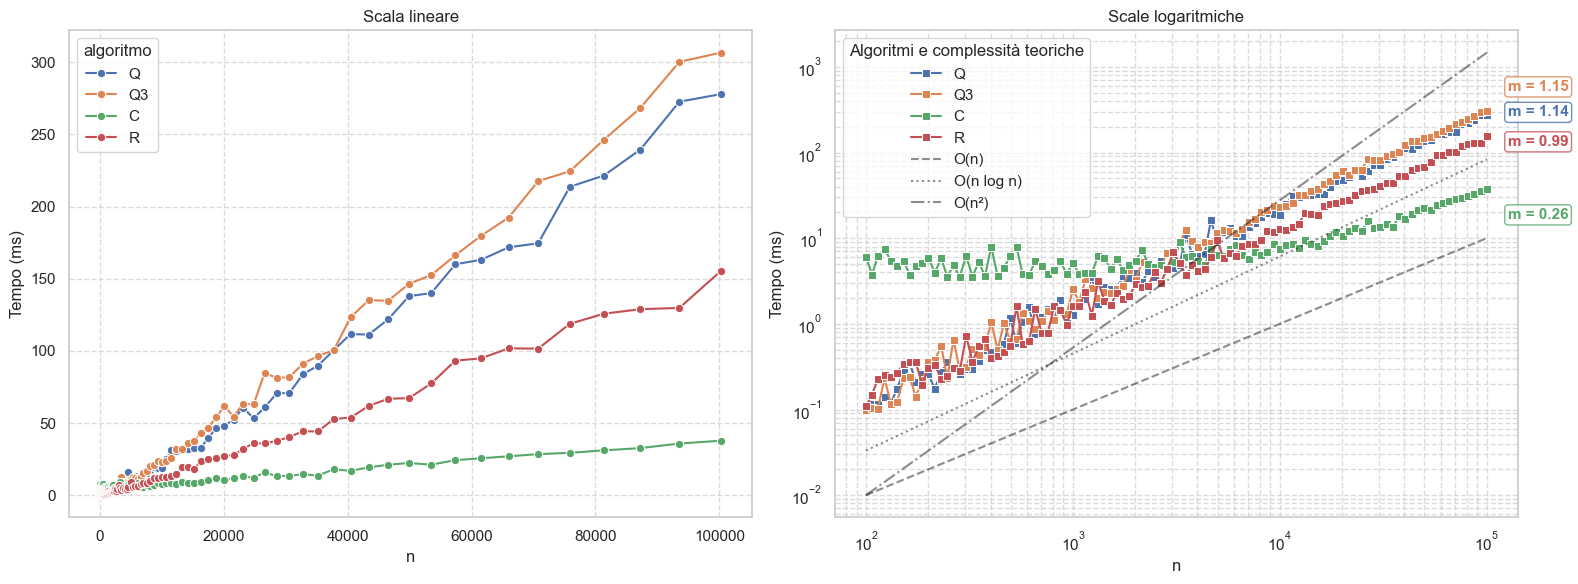

In [35]:
# 1)
# CONSIGLI: usa grafici comparativi, sia in scale lineari - che riportano ad es. n in ascissa e t(n) in ordinata - sia scale doppiamente logaritmiche
#           che riportano ad es. log(n) in x e log(t(n)) in y.

from matplotlib.ticker import ScalarFormatter
from scipy import stats

sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12

# usiamo i tempi in millisecondi
if 'tempi_ms' not in df.columns:
    df['tempi_ms'] = df['tempo'] * 1000

# faccio i grafici affiancati
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Grafico lineare
sns.lineplot(data=df, x='n', y='tempi_ms', hue='algoritmo', marker='o', ax=ax1)
ax1.set_title('Scala lineare')
ax1.set_xlabel('n')
ax1.set_ylabel('Tempo (ms)')
ax1.grid(True, linestyle='--', alpha=0.7)

# Da questo ricaviamo in ordine crescente di tempi medi di esecuzione: CountingSort, RadixSort, QuickSort, QuickSort3way

# Grafico logaritmico

# la pendenza della linea corrisponde all'esponente della complessità 
# -> pendenza = 1 -> O(n) lineare
# -> pendenza = 1,2-1,5 -> O(nlogn) 
# -> pendenza = 2 -> O(n^2) quadratica
# -> pendenza = 3 -> O(n^3) cubica
sns.lineplot(data=df, x='n', y='tempi_ms', hue='algoritmo', marker='s', ax=ax2)
ax2.set_title('Scale logaritmiche')
ax2.set_xlabel('n')
ax2.set_ylabel('Tempo (ms)')
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.grid(True, which='both', linestyle='--', alpha=0.7)

ax = plt.gca()
annotations_count = 0  # Contatore per tenere traccia delle annotazioni

for algorithm in df['algoritmo'].unique():
    algo_data = df[df['algoritmo'] == algorithm]
    if len(algo_data) < 2:
        continue
        
    x_log = np.log10(algo_data['n'])
    y_log = np.log10(algo_data['tempi_ms'])
    
    slope, intercept, _, _, _ = stats.linregress(x_log, y_log)
    
    x_end = max(algo_data['n'])
    y_end = 10**(slope * np.log10(x_end) + intercept)
    
    # Trova il colore dalla linea corrispondente
    color = 'black'
    for line in ax.get_lines():
        if line.get_label() == algorithm:
            color = line.get_color()
            break
    
    # Modifica l'offset per il secondo algoritmo
    annotations_count += 1
    if annotations_count == 2:  # Seconda annotazione
        text_offset = (15, 15)  # Sposta 15 punti più in alto
    else:
        text_offset = (15, 0)
    
    ax.annotate(f'm = {slope:.2f}', 
                xy=(x_end, y_end),
                xytext=text_offset,  # Usa offset diverso per il secondo
                textcoords='offset points',
                fontsize=11,
                fontweight='bold',
                color=color,
                ha='left',
                va='center',
                bbox=dict(boxstyle='round,pad=0.2', facecolor='white', alpha=0.8, edgecolor=color))

# aggiungiamo complessità teoriche per confrontarle con quelle che escono nei grafici

n_range = np.array([min(df['n']), max(df['n'])])

# Linee guida per complessità teoriche
plt.plot(n_range, 0.0001 * n_range, 'k--', alpha=0.5, label='O(n)')  # pendenza 1
plt.plot(n_range, 0.00005 * n_range * np.log2(n_range), 'k:', alpha=0.5, label='O(n log n)')  # pendenza ~1.3
plt.plot(n_range, 0.000001 * n_range**2, 'k-.', alpha=0.5, label='O(n²)')  # pendenza 2

plt.legend(title='Algoritmi e complessità teoriche')

plt.tight_layout()
plt.savefig('confronto_DEFINITIVO.png', dpi=300, bbox_inches='tight')
plt.show()

# CONCLUSIONI (OSSERVATE DAI GRAFICI):

# Grafico lineare: in ordine dal meno efficente al più efficente gli algoritmi, QuickSort, QuickSort3Way, RadixSort, CountingSort.
# Si nota che per input piccoli, quindi array con n piccolo, hanno efficenza simile. 
# Con input grandi notiamo innanzitutto che tutti e 4 gli algoritmi crescono quasi linearmente senza pendenze altalenanti.
# Al tempo = 100 (input circa 38000), QuickSort e QuickSort3Way si sovrappongono con stesso tempo di esecuzione. In generale hanno andamento simile.
# CountingSort invece presenta una crescita molto lenta, mantenendo un ottima efficenza anche per input molto grandi.

# Grafico logaritmico: per QuickSort, QuickSort3Way abbiamo costo medio di O(nlogn), quindi pendenza 1.14 e 1.15 [corretto];
#       per RadixSort abbiamo costo medio d*O(n), quindi lineare e pendenza 0.99 [corretto]
#       per CountingSort fa storcere il naso perché costo medio O(n+k), quindi lineare MA pendenza 0.26 (quindi quasi costante?!)
# Perciò notiamo come CountingSort sia estremamente efficente.
# Le distribuzioni di QuickSort e QuickSort3Way sono quasi sovrapposte, mentre quella di RadixSort é molto vicina alle due.
# Interessante é l'andamento iniziale di CountingSort che fino ad un n mediano fra 10^3 e 10^4 é quasi costante, mentre da quel punto in poi
# il tempo medio di esecuzione medio aumenta, sempre però rimanendo sotto agli andamenti degli altri algoritmi.

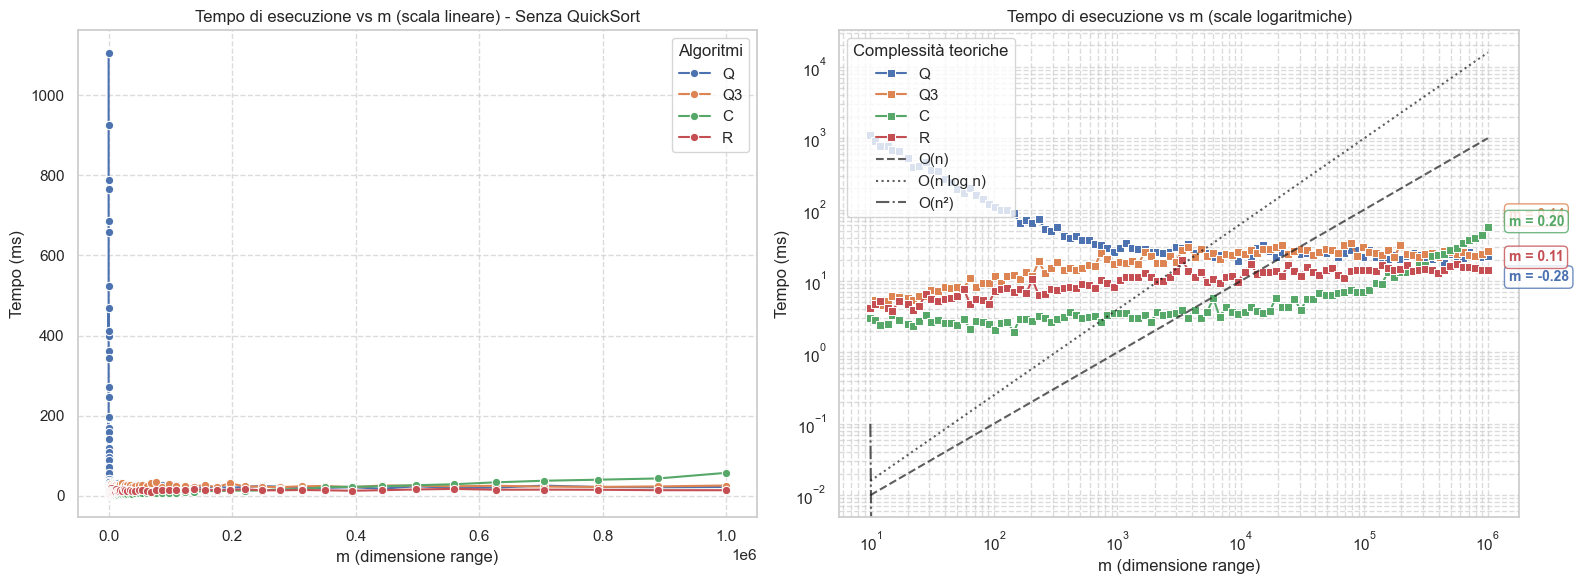

In [20]:
# 2)
# CONSIGLI: usa grafici comparativi, sia in scale lineari - che riportano ad es. n in ascissa e t(n) in ordinata - sia scale doppiamente logaritmiche
#           che riportano ad es. log(n) in x e log(t(n)) in y.

from matplotlib.ticker import ScalarFormatter
from scipy import stats
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (16, 8)
plt.rcParams['font.size'] = 12

# Converti i tempi in millisecondi
df['tempi_ms'] = df['tempo'] * 1000

# Filtra gli algoritmi per il grafico lineare (escludi QuickSort)
algoritmi_da_visualizzare = [a for a in df['algoritmo'].unique() if a != 'QuickSort']
df_filtrato = df[df['algoritmo'].isin(algoritmi_da_visualizzare)]

# Crea i grafici affiancati
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Grafico lineare SOLO per algoritmi veloci
sns.lineplot(data=df_filtrato, x='m', y='tempi_ms', hue='algoritmo', marker='o', ax=ax1)
ax1.set_title('Tempo di esecuzione vs m (scala lineare) - Senza QuickSort')
ax1.set_xlabel('m (dimensione range)')
ax1.set_ylabel('Tempo (ms)')
ax1.grid(True, linestyle='--', alpha=0.7)
ax1.legend(title='Algoritmi')

# Grafico logaritmico per TUTTI gli algoritmi
sns.lineplot(data=df, x='m', y='tempi_ms', hue='algoritmo', marker='s', ax=ax2)
ax2.set_title('Tempo di esecuzione vs m (scale logaritmiche)')
ax2.set_xlabel('m (dimensione range)')
ax2.set_ylabel('Tempo (ms)')
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.grid(True, which='both', linestyle='--', alpha=0.7)
ax2.legend(title='Algoritmi')

# Calcola e annota le pendenze per ogni algoritmo
for i, algorithm in enumerate(df['algoritmo'].unique()):
    algo_data = df[df['algoritmo'] == algorithm]
    if len(algo_data) < 2:
        continue
        
    x_log = np.log10(algo_data['m'])
    y_log = np.log10(algo_data['tempi_ms'])
    
    slope, intercept, r_value, p_value, std_err = stats.linregress(x_log, y_log)
    
    # Trova il punto finale per posizionare l'annotazione
    x_end = max(algo_data['m'])
    y_end = 10**(slope * np.log10(x_end) + intercept)
    
    # Trova il colore corrispondente all'algoritmo
    color = None
    for line in ax2.get_lines():
        if line.get_label() == algorithm:
            color = line.get_color()
            break
    
    if color is None:
        color = 'black'
    
    # Posiziona l'annotazione con un offset variabile
    offset_y = 15 * (i % 3)  # Alterna tra 0, 15, 30
    ax2.annotate(f'm = {slope:.2f}', 
                xy=(x_end, y_end),
                xytext=(15, offset_y),
                textcoords='offset points',
                fontsize=10,
                fontweight='bold',
                color=color,
                ha='left',
                bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8, edgecolor=color))

# Aggiungi linee guida per le complessità teoriche (solo nel grafico logaritmico)
m_range = np.array([min(df['m']), max(df['m'])])
line_styles = ['--', ':', '-.']
line_labels = ['O(n)', 'O(n log n)', 'O(n²)']

for i, (coeff, label) in enumerate(zip([1, 1.2, 2], line_labels)):
    # Crea una linea guida con pendenza approssimativa
    y_vals = 0.001 * (m_range ** coeff)
    ax2.plot(m_range, y_vals, 'k' + line_styles[i], alpha=0.7, label=label)

# Aggiungi una legenda separata per le complessità teoriche
ax2.legend(title='Complessità teoriche', loc='upper left', bbox_to_anchor=(0, 1))

plt.tight_layout()
# plt.savefig('confronto_algoritmi_m_variabile.png', dpi=300, bbox_inches='tight')
plt.show()